In [54]:
import numpy as np
import numpy.random as nrm
import random as rm
from matplotlib import pyplot as plt
import time
import itertools
from scipy.linalg import expm

In [352]:
n = 5     # Number of qubits 
M = 10    # Number of clauses
T = 100   # Number of time steps
dt= 0.05  # Time step size
u = nrm.randint(2,size=T)

sx = np.array([[0,1],[1,0]])
H0 = -reduce(lambda a,b: a+b,map(lambda i: gate(n,i+1,sx),range(n)))  # the diffusion operator
H1 = np.diag(nrm.randint(10,size=2**n)) #np.diag([-1]+[0]*(2**n-3)+[0,0])#                              # placeholder for max2sat instance
H = [H0,H1]
psi0   = 1/np.sqrt(2.**n)*np.ones(2**n)

In [60]:
psi = psi0
for i in range(T):  # ASSUMPTION: u only takes bang-bang values: 0 or 1
    psi = np.dot(expm(-1.j*H[u[i]]*dt),psi)
    np.vdot(psi,np.dot(H1,psi))

(3.6186510408013879-1.1102230246251565e-16j)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 7]])

In [144]:
def gate(n,i,X): # apply gate X on i-th qubit out of n qubits
    return np.kron(np.identity(2**(i-1)),np.kron(X,np.identity(2**(n-i))))

def CSPsim(H,u,dt,psi0): # Exact simulation of a H(u) on initial state psi0
    psi = psi0
    for i in range(len(u)):  # ASSUMPTION: u only takes bang-bang values: 0 or 1
        psi = np.dot(expm(-1.j*H[u[i]]*dt),psi)
    np.vdot(psi,np.dot(H1,psi))
    return psi

def energy(H,psi): return np.vdot(psi,np.dot(H,psi))

def greedyK(H,dt,psi0,K,T):
    bestpsi = [psi0]
    bestu   = [[]] #all protocols will begin with -1
    for i in range(T):
        trialpsi=[]
        trialu  =[]
        for j in range(len(bestpsi)):
            trialpsi.append(np.dot(expm(-1.j*H[0]*dt),bestpsi[j]))
            trialu.append(bestu[j]+[0])
            trialpsi.append(np.dot(expm(-1.j*H[1]*dt),bestpsi[j]))
            trialu.append(bestu[j]+[1])
        sortedtrials=np.argpartition(map(lambda x: energy(H[1],x),trialpsi),min(len(bestpsi)-1,K))
        bestpsi = [trialpsi[k] for k in sortedtrials[:K]]
        bestu   = [trialu[k] for k in sortedtrials[:K]]
    m = np.argmin(map(lambda x: energy(H[1],x), bestpsi))
    return bestu[m],energy(H[1],bestpsi[m])
def gradDesc(H,dt,psi0,u0,T): return 0

In [247]:
a = [greedyK(H,dt,psi0,1+i,20)[1] for i in range(10)]

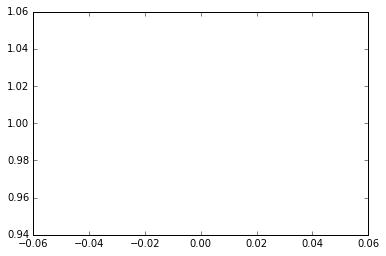

In [354]:
plt.plot(a);plt.show()

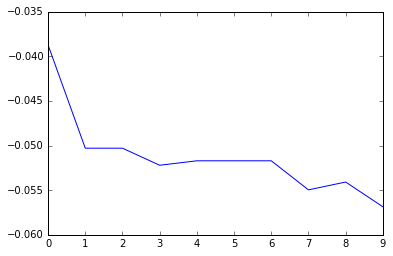

In [248]:
uopt,Eopt=greedyK(H,dt,psi0,40,200)

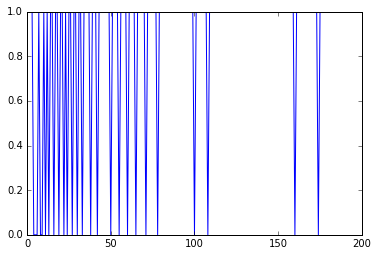

In [348]:
plt.plot(uopt);plt.show()

In [349]:
Eopt

(1.0599039987356023+0j)

In [357]:
np.sort(np.diag(H[1]))

array([0, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9])

In [362]:
a1=a2=a0=0
for k in range(10):
    ansatz0 = nrm.randint(2,size=20)
    ansatz1=[]
    ansatz2=[]
    for i in range(20):
        ansatz1.append(int(rm.random()<(1+0.01*i)/2))
        ansatz2.append(int(rm.random()<(1+(0.01*i)**2)/2))
    a0+=energy(H[1],CSPsim(H,ansatz0,dt,psi0)) 
    a1+=energy(H[1],CSPsim(H,ansatz1,dt,psi0))
    a2+=energy(H[1],CSPsim(H,ansatz2,dt,psi0))
print a0,a1,a2

(30.8088233061-2.77555756156e-17j) (29.7655404057-1.11022302463e-16j) (29.2162028986+2.08166817117e-16j)
